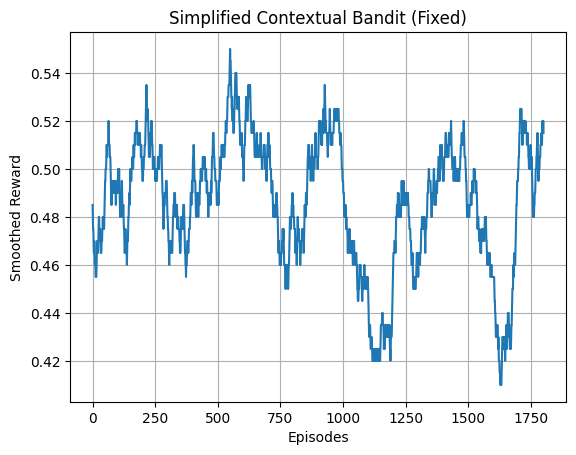

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
# Step 1: Config
arms = 10 # Number of arms
epochs = 2000 # Training steps
learning_rate = 0.01
hidden_dim = 50
tau = 2.0 # Temperature for softmax
smoothing_window = 200
# Step 2: Environment (contextual bandit)
reward_probs = np.random.rand(arms, arms) # Reward probs for each (state, arm)
current_state = np.random.randint(0, arms) # Start with random state
# Step 3: Model
model = nn.Sequential(
 nn.Linear(arms, hidden_dim),
 nn.ReLU(),
 nn.Linear(hidden_dim, arms)
)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
loss_fn = nn.MSELoss()
# Step 4: Training
rewards = []
for epoch in range(epochs):
 # One-hot encode state
 state_vector = torch.zeros(arms)
 state_vector[current_state] = 1.0
 # Predict values
 predicted_values = model(state_vector)
 # Action selection via softmax
 probs = torch.softmax(predicted_values / tau, dim=0)
 chosen_arm = torch.multinomial(probs, num_samples=1).item()
 # Reward (single Bernoulli trial)
 reward = 1 if np.random.rand() < reward_probs[current_state][chosen_arm] else 0
 # Create target: copy current prediction and update chosen arm
 target_values = predicted_values.clone().detach()
 target_values[chosen_arm] = reward
 # Train
 loss = loss_fn(predicted_values, target_values)
 optimizer.zero_grad()
 loss.backward()
 optimizer.step()
 # Next state & bookkeeping
 current_state = np.random.randint(0, arms)
 rewards.append(reward)
# Step 5: Plot smoothed rewards
smoothed_rewards = np.convolve(rewards,
np.ones(smoothing_window)/smoothing_window, mode="valid")
plt.plot(smoothed_rewards)
plt.xlabel("Episodes")
plt.ylabel("Smoothed Reward")
plt.title("Simplified Contextual Bandit (Fixed)")
plt.grid(True)
plt.show()